In [2]:
print("sairam")

sairam


In [3]:
import os
print(os.getcwd())
os.chdir("../")
print(os.getcwd())

d:\AI\E2E-Wine-Quality-project\research
d:\AI\E2E-Wine-Quality-project


In [4]:
import pandas as pd
import numpy as np

In [6]:
data_path = "data/winequality-red.csv"
wines = pd.read_csv(data_path)
wines.shape

(1599, 12)

In [7]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wines.isnull().mean()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

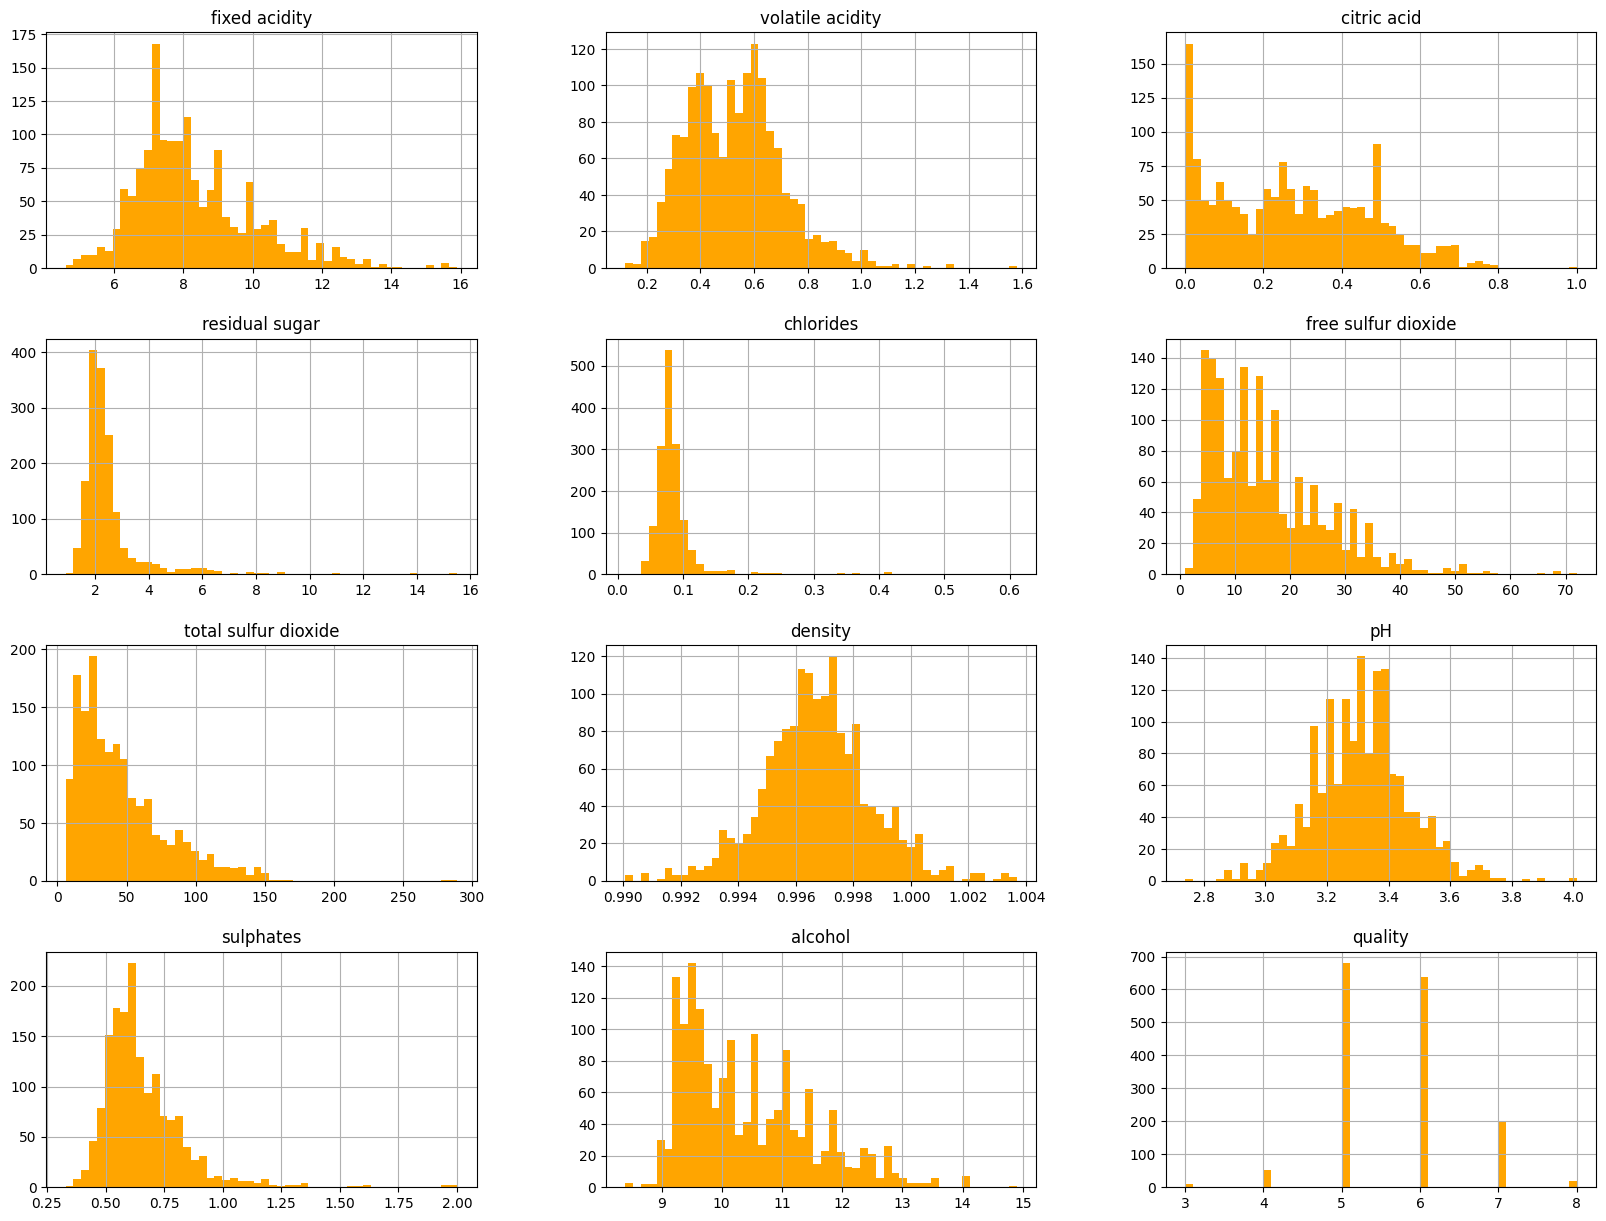

In [9]:
import matplotlib.pyplot as plt

wines.hist(bins=50, figsize=(20,15), color='orange')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = wines.drop('quality', axis=1)
y = wines['quality']

print(X.shape, y.shape)

(1599, 11) (1599,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1279, 11) (1279,)
(320, 11) (320,)


In [12]:
from sklearn.linear_model import ElasticNet

lr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

def evaluate_model(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    
    return rmse, mae, r2    

In [18]:
y_pred = lr.predict(X_test)
rmse, mae, r2 = evaluate_model(y_test, y_pred)

print(rmse, mae, r2)

0.6985911523308714 0.5590548688059019 0.25321312561494613
